In [3]:
%pip install vanna
 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import vanna
from vanna.remote import VannaDefault


In [2]:
api_key = vanna.get_api_key('email')


In [3]:
vanna_model_name = "chinook" #nome da base de dados
vn = VannaDefault(model=vanna_model_name,api_key=api_key) #parametros

In [4]:
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')

SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 3;
   ArtistId         Name  TotalSales
0        90  Iron Maiden         140
1       150           U2         107
2        50    Metallica          91


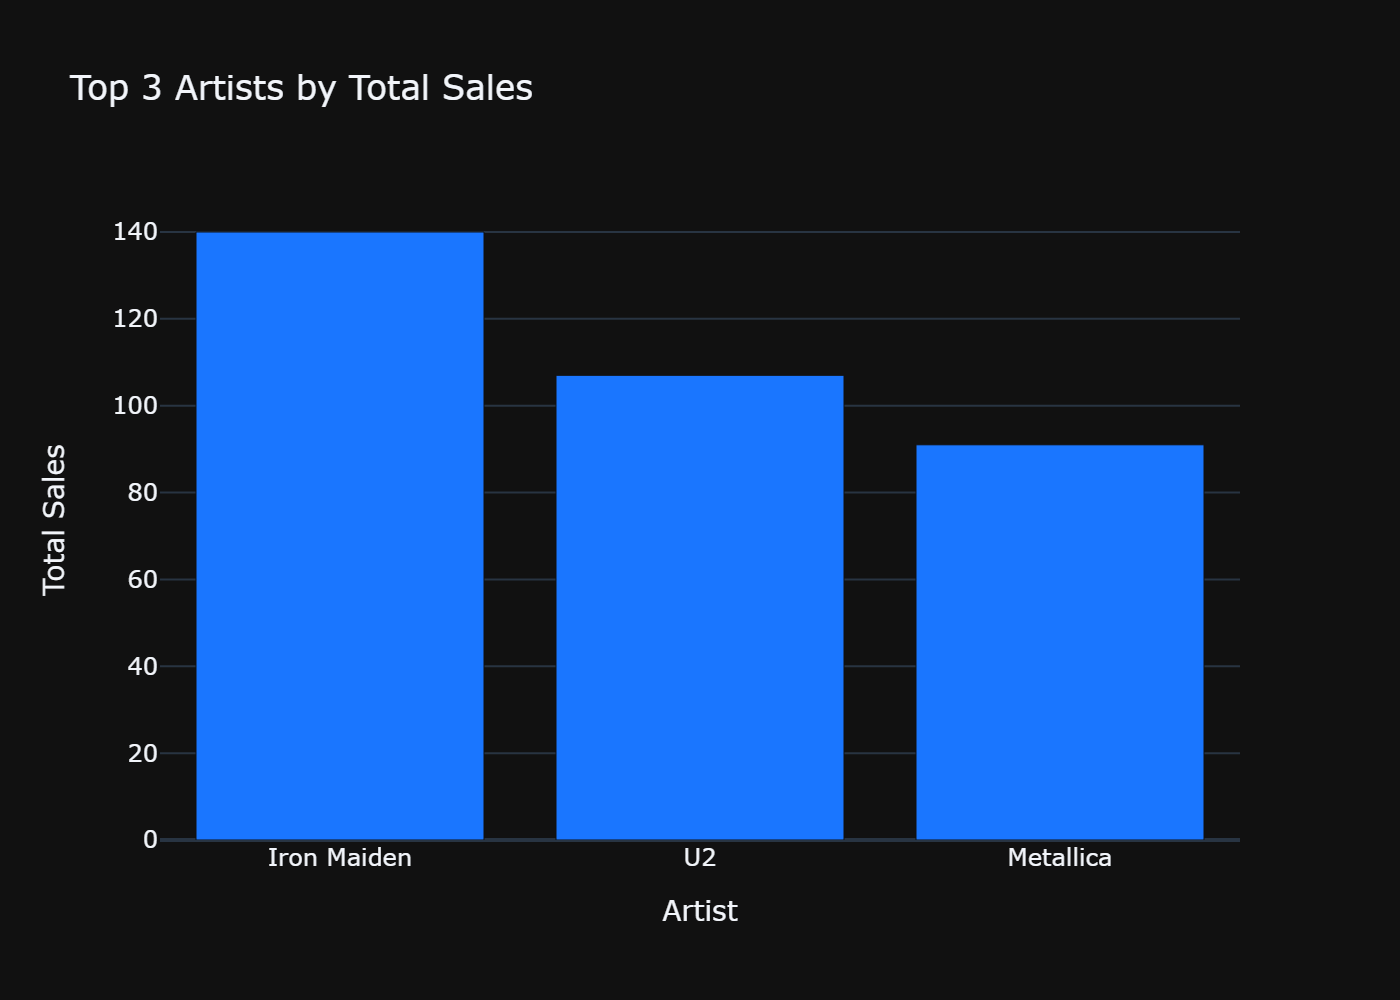

In [5]:
vn.ask('Quais são os TOP 3 artistas mais vendidos')

SELECT SUM(Total) AS TotalFaturado
FROM Invoice;
   TotalFaturado
0         2328.6


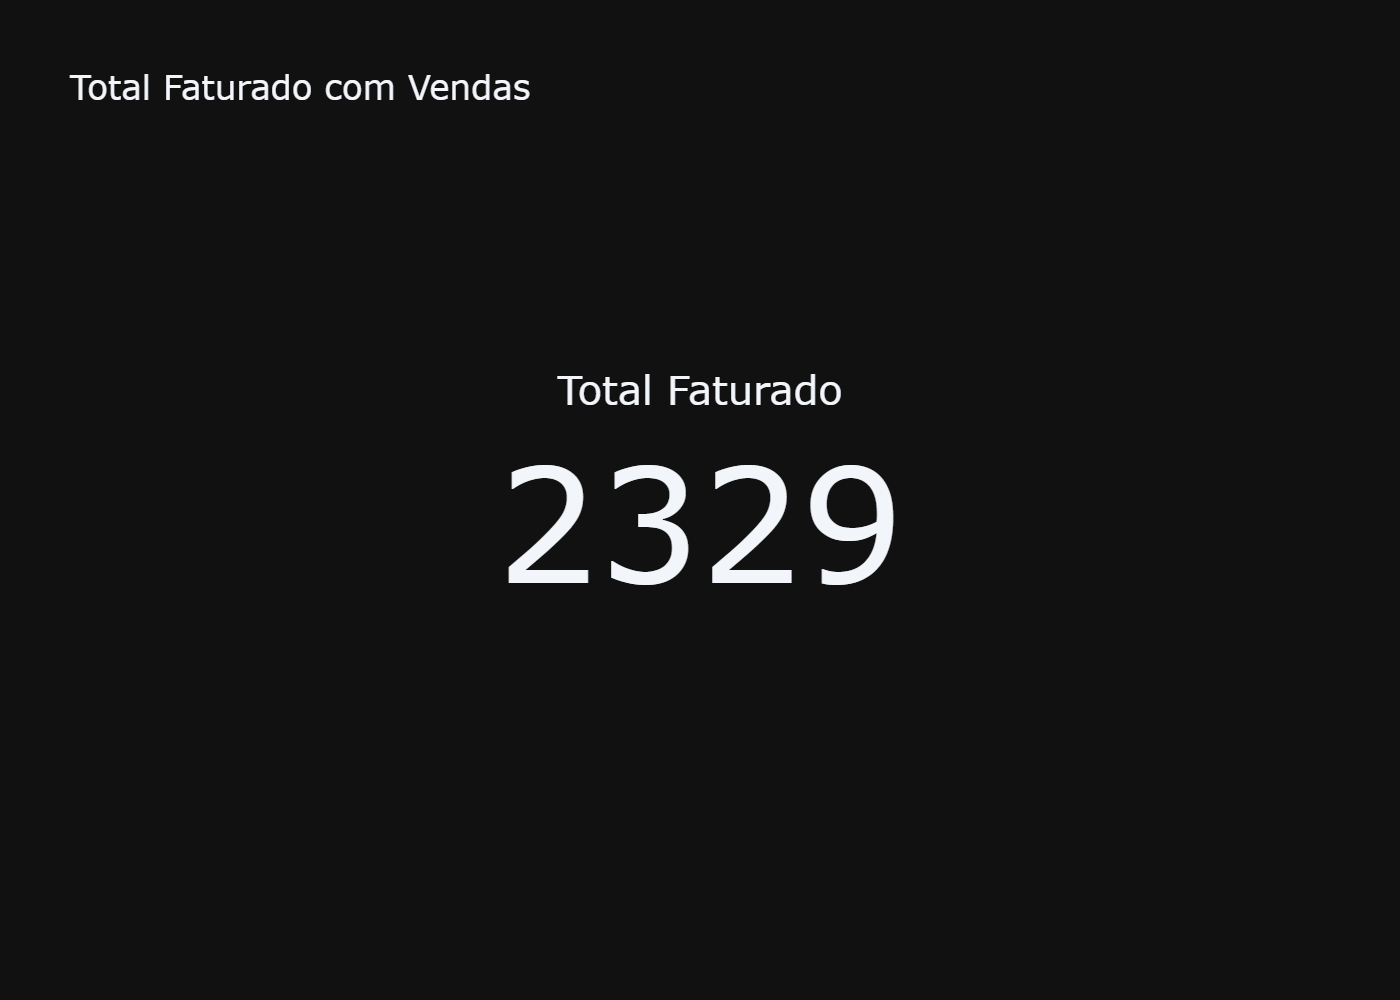

In [6]:
vn.ask('Qual o total faturado com vendas')

In [7]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
